# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier,KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df=pd.read_csv('gas_turbines.csv')

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<Axes: >

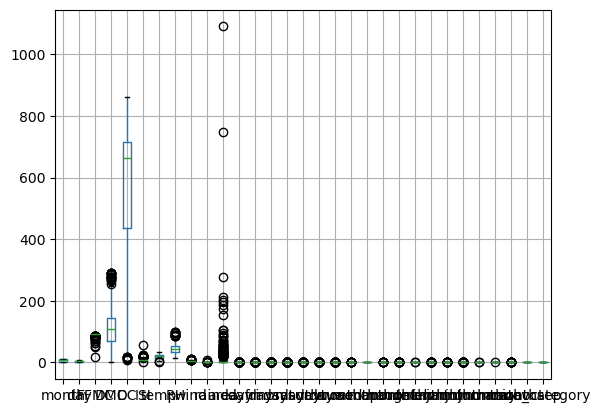

In [49]:
df.boxplot()

In [50]:
dff=df.corr()

<Axes: >

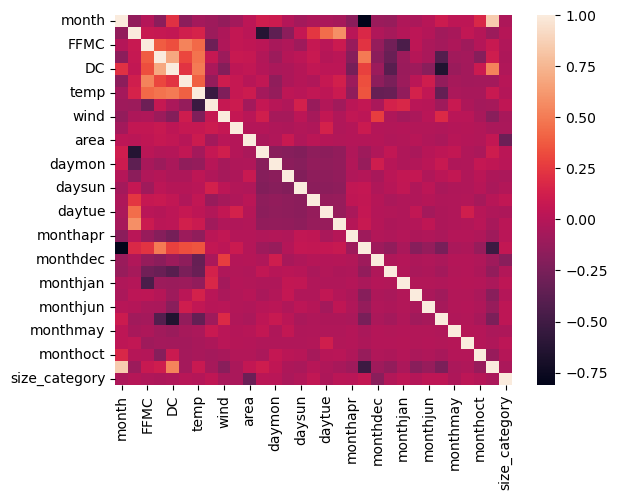

In [57]:
sns.heatmap(dff)

In [5]:
target=df[['TEY']]

In [6]:
target

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [7]:
feaures=df.drop(['TEY'],axis=1)

In [8]:
feaures

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [9]:
x_train,x_test,y_train,y_test=train_test_split(feaures,target,train_size=0.75,random_state=100)

In [10]:
x_train.shape

(11279, 10)

In [11]:
x_test.shape

(3760, 10)

### Building the model

In [12]:
model=Sequential()

In [13]:
model.add(Dense(50,activation='relu',input_shape=(10,)))
model.add(Dropout(0.1))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1851 (7.23 KB)
Trainable params: 1851 (7.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [14]:
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics='mse')

### Fitting the model
##### epochs=3 ,batch_size=100

In [15]:
history=model.fit(x_train,y_train,epochs=3,batch_size=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/3
113/113 [==============================] - 3s 9ms/step - loss: 3526.5684 - mse: 3526.5684 - val_loss: 421.1002 - val_mse: 421.1002
Epoch 2/3
113/113 [==============================] - 1s 5ms/step - loss: 618.7425 - mse: 618.7425 - val_loss: 187.0294 - val_mse: 187.0294
Epoch 3/3
113/113 [==============================] - 1s 5ms/step - loss: 496.8468 - mse: 496.8468 - val_loss: 308.1035 - val_mse: 308.1035


In [16]:
score=model.evaluate(x_test,y_test)

118/118 [==============================] - 0s 3ms/step - loss: 308.1035 - mse: 308.1035


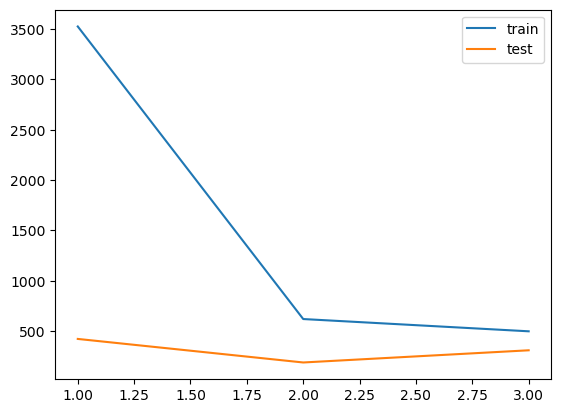

In [17]:
plt.plot(range(1,4),history.history['loss'],label='train')
plt.plot(range(1,4),history.history['val_loss'],label='test')
plt.legend()

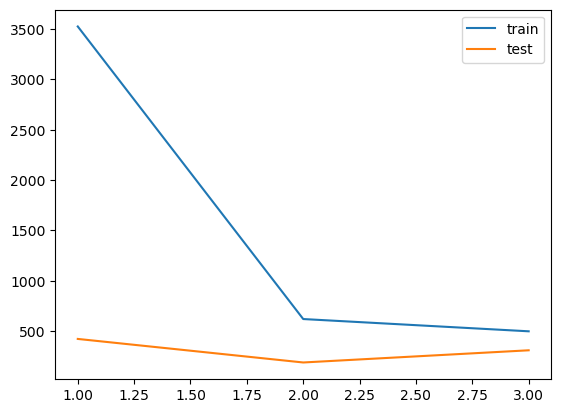

In [18]:
plt.plot(range(1,4),history.history['mse'],label='train')
plt.plot(range(1,4),history.history['val_mse'],label='test')
plt.legend()

In [19]:
y_pred=model.predict(x_test)

118/118 [==============================] - 0s 2ms/step


In [20]:
r2_score(y_test,y_pred)

-0.22296516121709486

### Fitting the model
##### epochs=8 ,batch_size=150

In [21]:
history=model.fit(x_train,y_train,epochs=8,batch_size=150,verbose=1,validation_data=(x_test,y_test))

Epoch 1/8
76/76 [==============================] - 0s 7ms/step - loss: 446.6501 - mse: 446.6501 - val_loss: 342.3246 - val_mse: 342.3246
Epoch 2/8
76/76 [==============================] - 0s 6ms/step - loss: 402.6578 - mse: 402.6578 - val_loss: 683.9243 - val_mse: 683.9243
Epoch 3/8
76/76 [==============================] - 1s 6ms/step - loss: 386.5708 - mse: 386.5708 - val_loss: 596.3511 - val_mse: 596.3511
Epoch 4/8
76/76 [==============================] - 0s 6ms/step - loss: 354.8655 - mse: 354.8655 - val_loss: 76.1253 - val_mse: 76.1253
Epoch 5/8
76/76 [==============================] - 0s 6ms/step - loss: 339.7732 - mse: 339.7732 - val_loss: 563.9776 - val_mse: 563.9776
Epoch 6/8
76/76 [==============================] - 1s 10ms/step - loss: 310.1720 - mse: 310.1720 - val_loss: 258.0550 - val_mse: 258.0550
Epoch 7/8
76/76 [==============================] - 0s 6ms/step - loss: 296.6205 - mse: 296.6205 - val_loss: 43.7163 - val_mse: 43.7163
Epoch 8/8
76/76 [===========================

In [22]:
score=model.evaluate(x_test,y_test)

118/118 [==============================] - 0s 3ms/step - loss: 182.3739 - mse: 182.3739


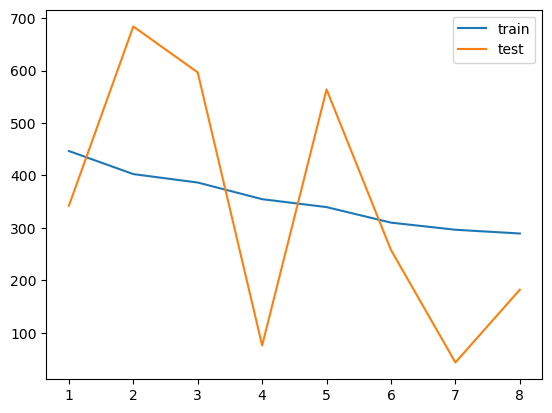

In [23]:
plt.plot(range(1,9),history.history['loss'],label='train')
plt.plot(range(1,9),history.history['val_loss'],label='test')
plt.legend()

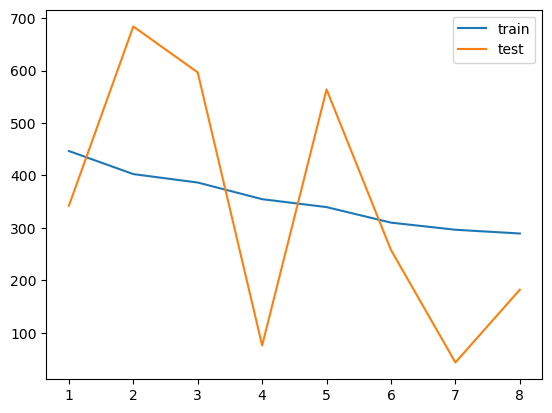

In [24]:
plt.plot(range(1,9),history.history['mse'],label='train')
plt.plot(range(1,9),history.history['val_mse'],label='test')
plt.legend()

In [25]:
y_pred=model.predict(x_test)

118/118 [==============================] - 0s 2ms/step


In [26]:
r2_score(y_test,y_pred)

0.27609718196386857

# 

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [27]:
df=pd.read_csv('forestfires.csv')

In [28]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [58]:
dff=df.corr()

<Axes: >

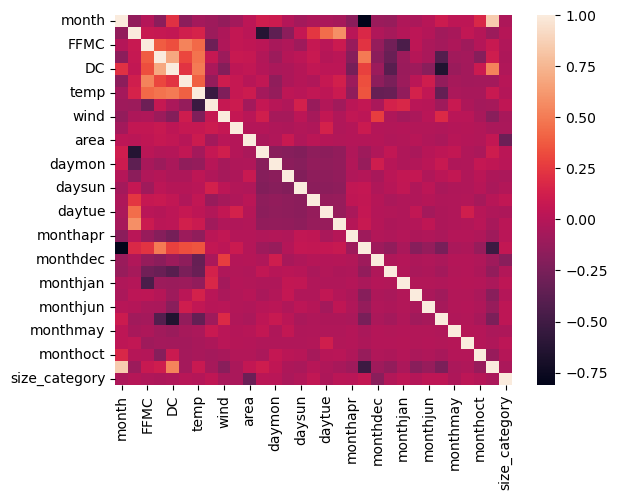

In [59]:
sns.heatmap(dff)

array([[<Axes: title={'center': 'size_category'}>]], dtype=object)

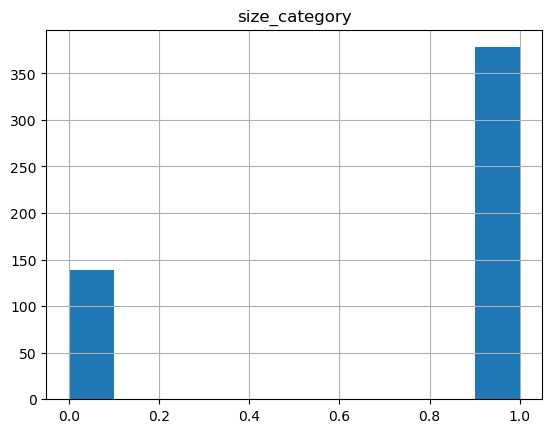

In [60]:
df.hist(column='size_category')

In [30]:
leb=LabelEncoder()

In [31]:
df['month']=leb.fit_transform(df['month'])
df['day']=leb.fit_transform(df['day'])
df['size_category']=leb.fit_transform(df['size_category'])

In [32]:
features=df.drop(['size_category'],axis=1)
features

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
target=df['size_category']
target

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [34]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=50)

In [35]:
x_train.shape

(387, 30)

In [36]:
y_test.shape

(130,)

In [37]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

### Building a model

In [38]:
model1=Sequential()
model1.add(Dense(80,activation='relu',input_shape=(30,)))
model1.add(Dropout(0.2))
model1.add(Dense(40,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(2,activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                2480      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 82        
                                                                 
Total params: 5802 (22.66 KB)
Trainable params: 5802 (22.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [39]:
model1.compile(optimizer='rmsprop',loss='BinaryCrossentropy',metrics='accuracy')

### Fitting the model
##### epochs=10,batch_size=50

In [40]:
history=model1.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/10
8/8 [==============================] - 2s 53ms/step - loss: 19.6106 - accuracy: 0.5943 - val_loss: 6.3825 - val_accuracy: 0.7231
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 14.1215 - accuracy: 0.6098 - val_loss: 6.6340 - val_accuracy: 0.7385
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 14.1067 - accuracy: 0.5866 - val_loss: 4.2888 - val_accuracy: 0.7385
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 9.6015 - accuracy: 0.6150 - val_loss: 3.1682 - val_accuracy: 0.7462
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 7.7820 - accuracy: 0.6253 - val_loss: 1.3563 - val_accuracy: 0.7692
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 7.0494 - accuracy: 0.6253 - val_loss: 2.3098 - val_accuracy: 0.7615
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 5.5385 - accuracy: 0.6408 - val_loss: 2.6099 - val_accuracy: 0.7462
Epoch 8/10
8/8 [========

In [41]:
model1.evaluate(x_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.7478 - accuracy: 0.7538


[0.7478154301643372, 0.7538461685180664]

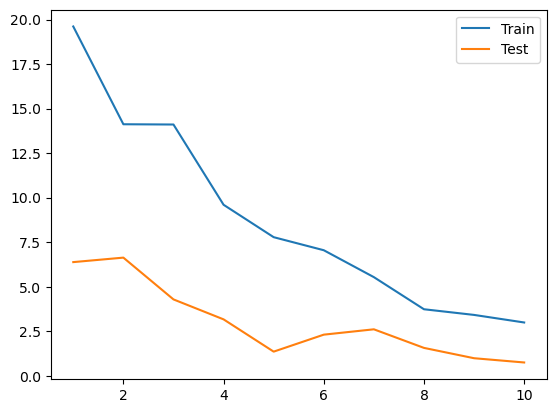

In [42]:
plt.plot(range(1,11),history.history['loss'],label='Train')
plt.plot(range(1,11),history.history['val_loss'],label='Test')
plt.legend()

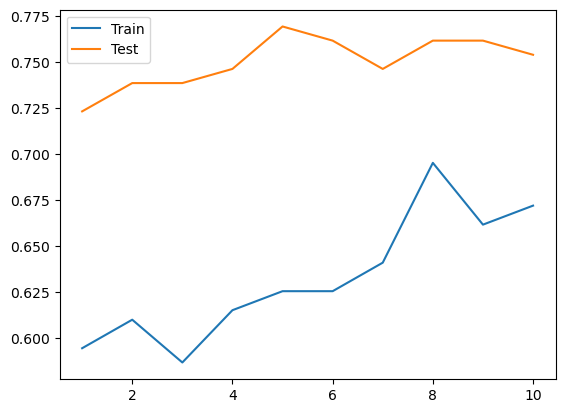

In [43]:
plt.plot(range(1,11),history.history['accuracy'],label='Train')
plt.plot(range(1,11),history.history['val_accuracy'],label='Test')
plt.legend()

### Fitting the model
##### epochs=15,batch_size=80

In [44]:
history=model1.fit(x_train,y_train,epochs=15,batch_size=80,validation_data=(x_test,y_test))

Epoch 1/15
5/5 [==============================] - 0s 42ms/step - loss: 2.1037 - accuracy: 0.6512 - val_loss: 0.6879 - val_accuracy: 0.7462
Epoch 2/15
5/5 [==============================] - 0s 18ms/step - loss: 2.1062 - accuracy: 0.6796 - val_loss: 0.6361 - val_accuracy: 0.7462
Epoch 3/15
5/5 [==============================] - 0s 20ms/step - loss: 1.9265 - accuracy: 0.6796 - val_loss: 0.5895 - val_accuracy: 0.7462
Epoch 4/15
5/5 [==============================] - 0s 25ms/step - loss: 1.4739 - accuracy: 0.6848 - val_loss: 0.6073 - val_accuracy: 0.7462
Epoch 5/15
5/5 [==============================] - 0s 22ms/step - loss: 1.3199 - accuracy: 0.6977 - val_loss: 0.5855 - val_accuracy: 0.7462
Epoch 6/15
5/5 [==============================] - 0s 18ms/step - loss: 0.9685 - accuracy: 0.7313 - val_loss: 0.5945 - val_accuracy: 0.7462
Epoch 7/15
5/5 [==============================] - 0s 18ms/step - loss: 1.0816 - accuracy: 0.6796 - val_loss: 0.6665 - val_accuracy: 0.7462
Epoch 8/15
5/5 [===========

In [45]:
model1.evaluate(x_test,y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.6541 - accuracy: 0.7462


[0.6540564894676208, 0.7461538314819336]

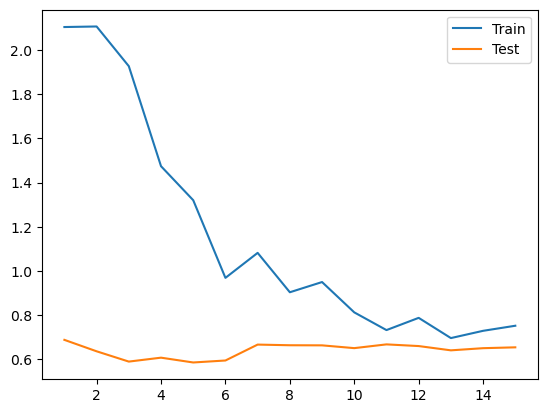

In [48]:
plt.plot(range(1,16),history.history['loss'],label='Train')
plt.plot(range(1,16),history.history['val_loss'],label='Test')
plt.legend()

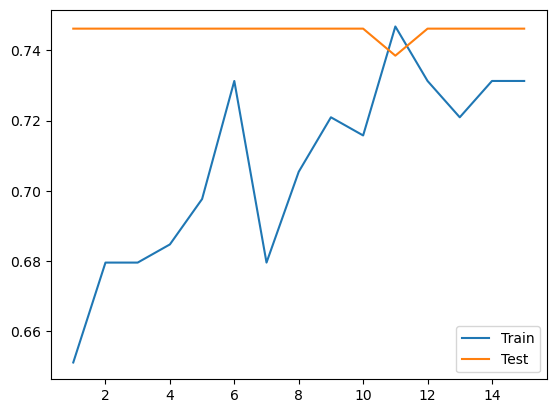

In [47]:
plt.plot(range(1,16),history.history['accuracy'],label='Train')
plt.plot(range(1,16),history.history['val_accuracy'],label='Test')
plt.legend()